# A. Introduction
Dataset ini merupakan data tentang aplikasi online uber dan lyft, yang dimana di dalam dataset ini berisikan data cuaca, id pengguna, harga, waktu, jenis kendaraan dan lainnya. Walaupun banyak mengandung nilai NA, tetapi dataset ini sangat baik untuk melihat pola antara prediktor seperti harga dan jam menggunakan Linear Regresi.

* Objective : Prediksi nilai price serta menemukan kolom mana yang paling berpengaruh terhadap harga.

# B. Import Library

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# C. Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# D. Data Cleaning
Sebelum melakukan EDA, data akan dicek terlebih dahulu untuk melihat kolom mana yang akan digunakan, apakah tipe data kolom tersebut benar atau belum, apakah ada missing value, dan apakah ada kolom baru yang akan ditambahkan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
# Pada dataset ini terdapat 57 kolom termasuk 11 kolom dengan tipe data object. Kemudian akan dicek terlebih dahulu apa isi data di kolom tersebut.

df[list(df.select_dtypes(include='object'))].head()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


In [5]:
# Kolom datetime akan diubah menjadi datetime, sedangkan kolom lain akan diubah menjadi tipe data category.

df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
obj_col_list = df.columns[df.dtypes == 'object'].to_list()
for col in obj_col_list:
    df[col] = df[col].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  category      
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  category      
 7   source                       693071 non-null  category      
 8   destination                  693071 non-null  category      
 9   cab_type                     693071 non-null  category      
 10  product_id                   693071 non-null  category      
 11  name                      

In [8]:
# Selanjutnya akan dicek apakah ada missing values.

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [9]:
# Kolom price ternyata memiliki nilai null, maka akan dihapus baris yang mengandung nilai null tersebut karena tidak terlalu berpengaruh dengan total data.

df.dropna(inplace=True, axis=0)

In [10]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [11]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# E. Explorasi Data & Visualization
Analisis Harga berdasarkan Cab Type

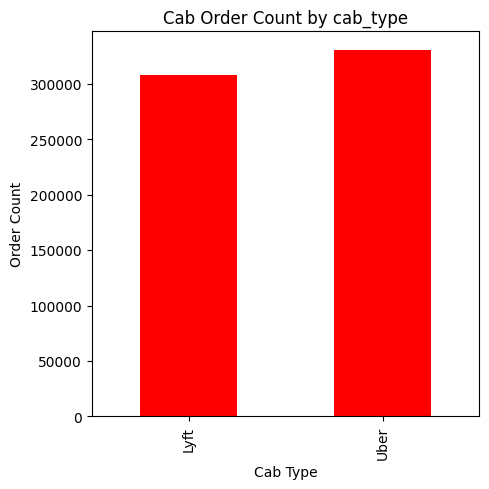

In [12]:
# count
df_cab_type = df.pivot_table(index='cab_type',
                             values='id',
                             aggfunc='count')
df_cab_type.rename(columns={'id':'count cab order'}, inplace=True)
df_cab_type.plot(kind='bar', figsize=(5, 5), color='red', legend=None)
plt.title('Cab Order Count by cab_type')
plt.ylabel('Order Count')
plt.xlabel('Cab Type')
plt.show()

In [13]:
# standard deviation
df_day = df.groupby(['cab_type'])['price']
df_day.describe()['std']

cab_type
Lyft    10.019171
Uber     8.560300
Name: std, dtype: float64

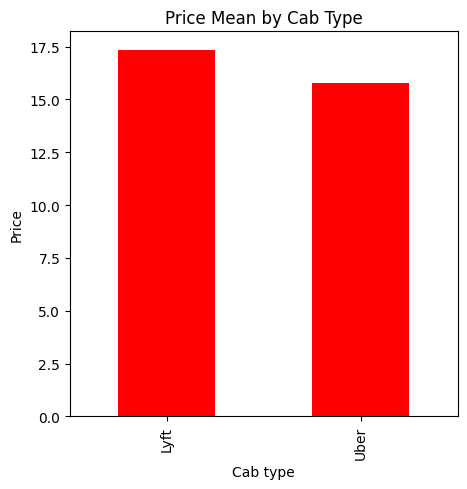

In [14]:
# mean
df_cab_type = df.pivot_table(index='cab_type',
                             values='price',
                             aggfunc='mean')
df_cab_type.rename(columns={'id':'count cab order'}, inplace=True)
df_cab_type.plot(kind='bar', figsize=(5, 5), color='red', legend=None)
plt.title('Price Mean by Cab Type')
plt.ylabel('Price')
plt.xlabel('Cab type')
plt.show()

Analisis Harga berdasarkan Tempat (Source-Destination)

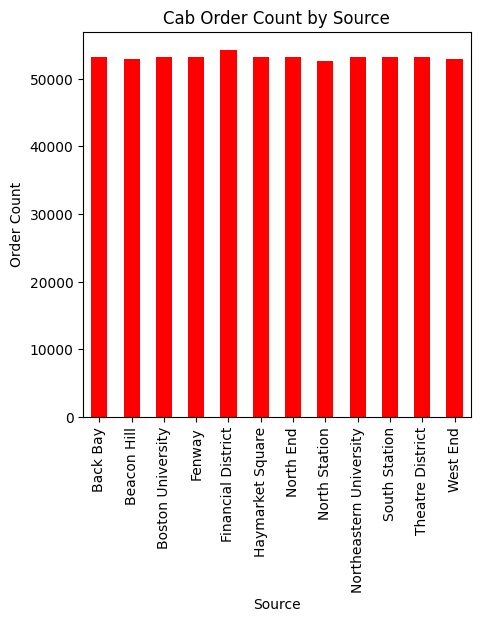

In [15]:
# source count
df_source = df.pivot_table(index='source',
                           values='id',
                           aggfunc='count')
df_source.rename(columns={'id':'count cab order'}, inplace=True)
df_source.plot(kind='bar', figsize=(5, 5), color='red', legend=None)
plt.title('Cab Order Count by Source')
plt.ylabel('Order Count')
plt.xlabel('Source')
plt.show()

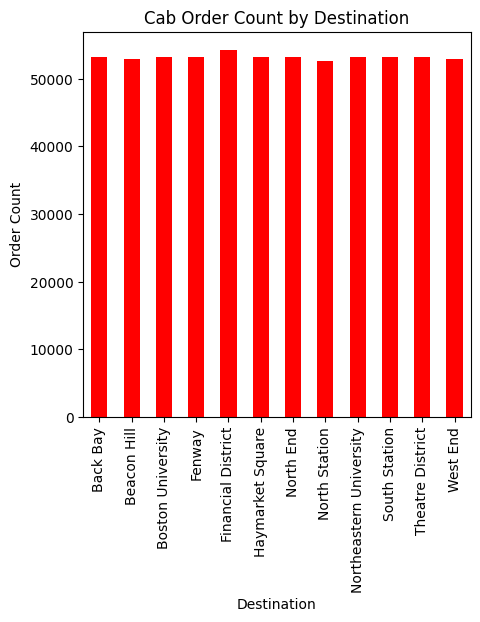

In [16]:
# destination count
df_destination = df.pivot_table(index='source',
                                values='id',
                                aggfunc='count')
df_destination.rename(columns={'id':'count cab order'}, inplace=True)
df_destination.plot(kind='bar', figsize=(5, 5), color='red', legend=None)
plt.title('Cab Order Count by Destination')
plt.ylabel('Order Count')
plt.xlabel('Destination')
plt.show()

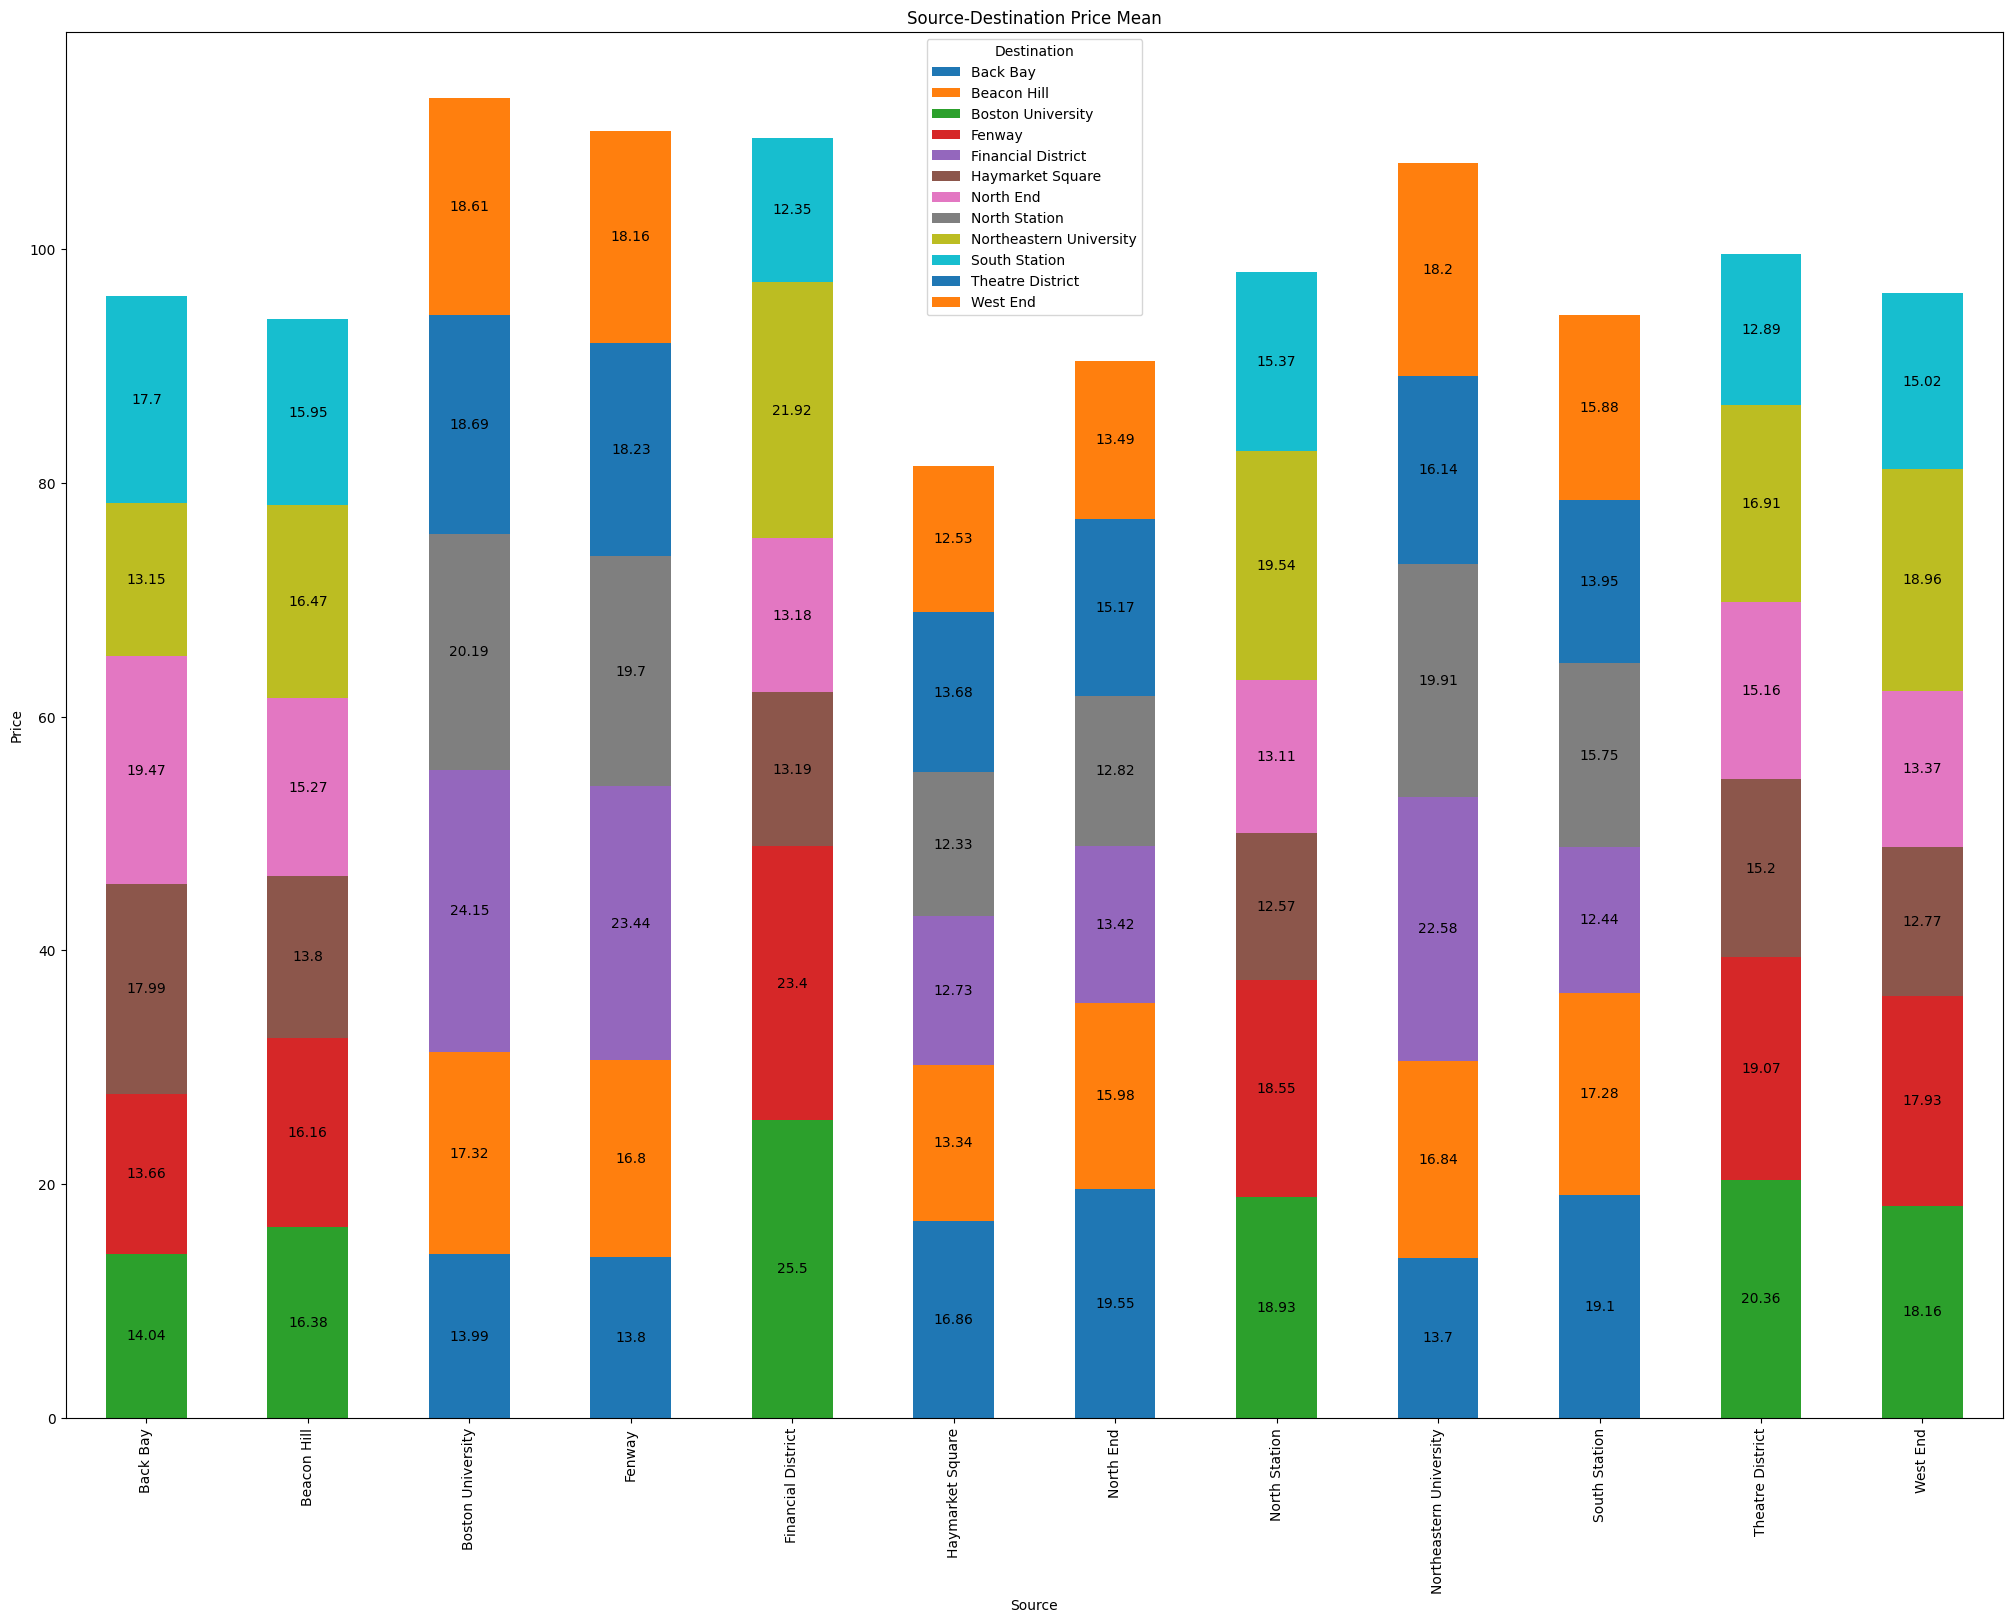

In [17]:
# source-destination mean
df_sc_dst = df.pivot_table(index='source',
                           columns='destination',
                           values='price',
                           aggfunc=np.mean)
plot = df_sc_dst.plot(kind='bar', stacked=True, figsize=(25, 18))
plt.legend(title='Destination')
plt.title('Source-Destination Price Mean')
plt.ylabel('Price')
plt.xlabel('Source')
for mean in plot.containers:
    labels = [round(v.get_height(),2) if v.get_height() > 0 else '' for v in mean]
    plot.bar_label(mean, labels=labels, label_type='center')
plt.show()

Analisis Harga berdasarkan Jenis Kendaraan

In [18]:
# count
df_cabtype_name = df.pivot_table(index='cab_type',
                                 columns='name',
                                 values='id',
                                 aggfunc='count')
df_cabtype_name

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,0,55091,55094,55096,55096


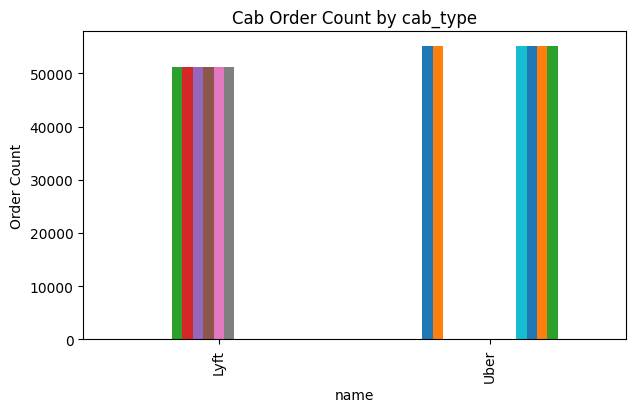

In [19]:
df_cab_type.rename(columns={'id':'count cab order'}, inplace=True)
df_cabtype_name.plot(kind='bar', figsize=(7, 4), legend=None)
plt.title('Cab Order Count by cab_type')
plt.ylabel('Order Count')
plt.xlabel('name')
plt.show()

In [20]:
# standard deviation
df_name = df.groupby(['name'])['price']
df_name.describe()['std']

name
Black           4.952030
Black SUV       4.836097
Lux             5.291983
Lux Black       6.472883
Lux Black XL    7.181094
Lyft            2.530305
Lyft XL         4.555513
Shared          2.107730
Taxi                 NaN
UberPool        2.106251
UberX           2.465101
UberXL          4.523876
WAV             2.465085
Name: std, dtype: float64

In [21]:
# mean
df_cabtype_name = df.pivot_table(index='name',
                                 values='price',
                                 aggfunc='mean')
df_cabtype_name

,price
name,
Black,20.523786
Black SUV,30.286763
Lux,17.771240
Lux Black,23.062468
Lux Black XL,32.324086
Lyft,9.610885
Lyft XL,15.309363
Shared,6.029893
UberPool,8.752500


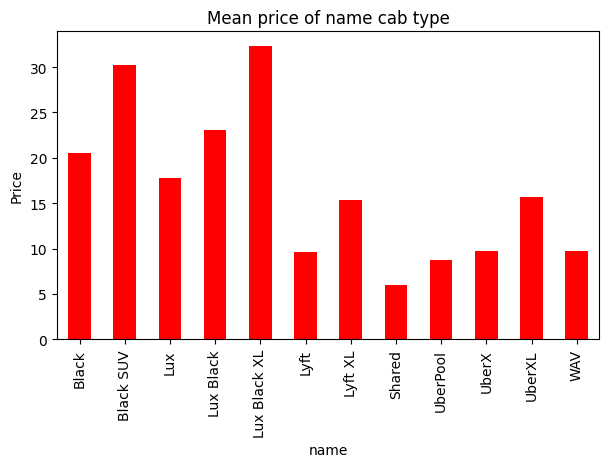

In [22]:
df_cabtype_name.rename(columns={'id':'count cab order'}, inplace=True)
df_cabtype_name.plot(kind='bar', figsize=(7, 4), color='red', legend=None)
plt.title('Mean price of name cab type')
plt.ylabel('Price')
plt.xlabel('name')
plt.show()

Analisis Harga berdasarkan waktu (Hari & Jam)
---
* Hari

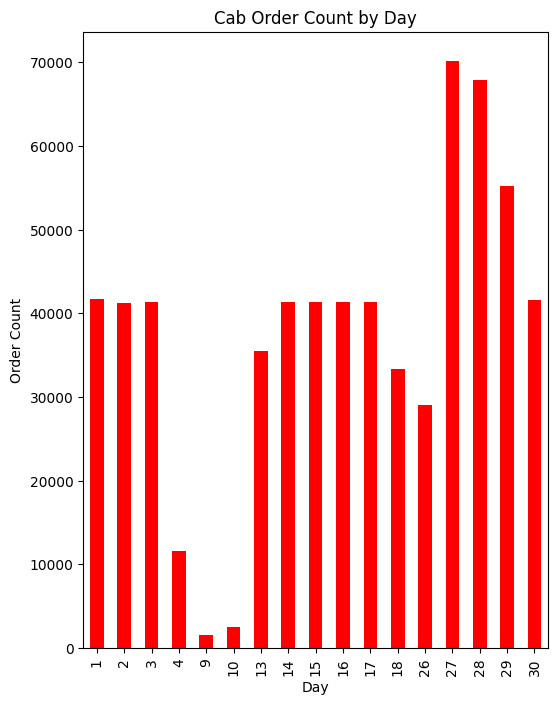

In [23]:
# count
df_hari = df.pivot_table(index='day',
                        values='id',
                        aggfunc='count')
df_hari.rename(columns={'id':'count cab order'}, inplace=True)
df_hari.plot(kind='bar', figsize=(6, 8), color='red', legend=None)
plt.title('Cab Order Count by Day')
plt.ylabel('Order Count')
plt.xlabel('Day')
plt.show()

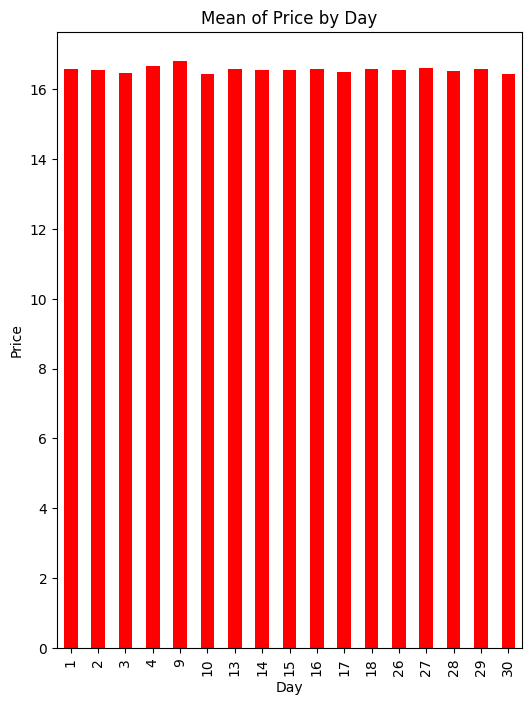

In [24]:
# mean
df_hari = df.pivot_table(index='day',
                        values='price',
                        aggfunc=np.mean)
df_hari.plot(kind='bar', figsize=(6, 8), color='red', legend=None)
plt.title('Mean of Price by Day')
plt.ylabel('Price')
plt.xlabel('Day')
plt.show()

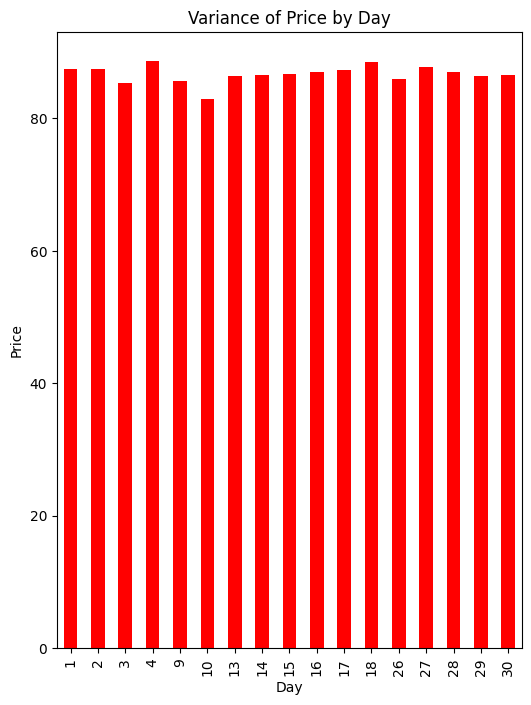

In [25]:
# variance
df_hari = df.pivot_table(index='day',
                        values='price',
                        aggfunc=statistics.variance)
df_hari.plot(kind='bar', figsize=(6, 8), color='red', legend=None)
plt.title('Variance of Price by Day')
plt.ylabel('Price')
plt.xlabel('Day')
plt.show()

In [26]:
# standard deviation
df_hari = df.groupby(['day'])['price']
df_hari.describe()['std']

day
1     9.352676
2     9.353373
3     9.242551
4     9.414552
9     9.252346
10    9.110735
13    9.293587
14    9.302670
15    9.309548
16    9.326386
17    9.345715
18    9.410368
26    9.271219
27    9.366719
28    9.328955
29    9.294890
30    9.304620
Name: std, dtype: float64

* Jam

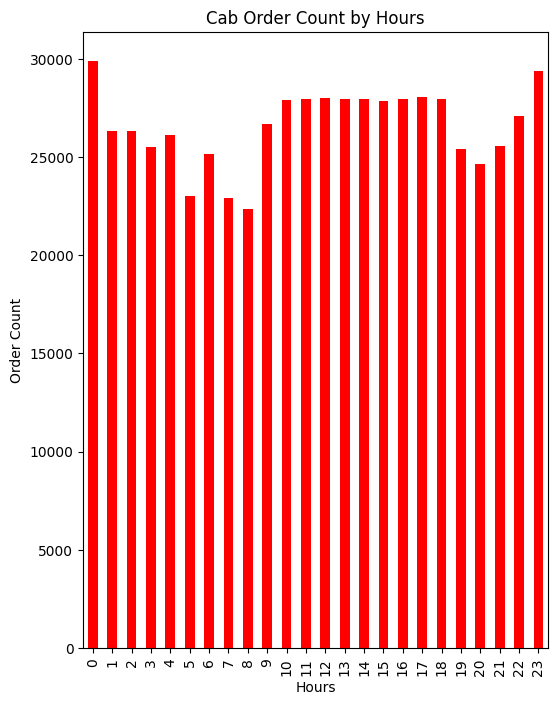

In [27]:
# count
df_jam = df.pivot_table(index='hour',
                        values='id',
                        aggfunc='count')
df_jam.rename(columns={'id':'count cab order'}, inplace=True)
df_jam.plot(kind='bar', figsize=(6, 8), color='red', legend=None)
plt.title('Cab Order Count by Hours')
plt.ylabel('Order Count')
plt.xlabel('Hours')
plt.show()

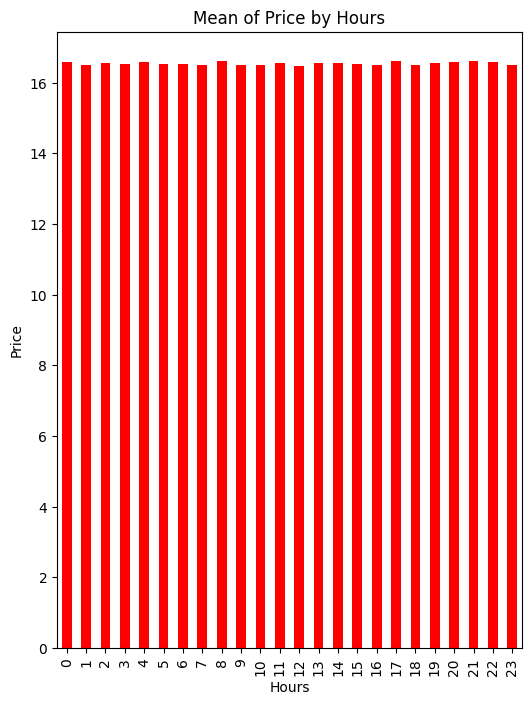

In [28]:
# mean
df_jam = df.pivot_table(index='hour',
                        values='price',
                        aggfunc='mean')
df_jam.rename(columns={'id':'cab order count'}, inplace=True)
df_jam.plot(kind='bar', figsize=(6, 8), color='red', legend=None)
plt.title('Mean of Price by Hours')
plt.ylabel('Price')
plt.xlabel('Hours')
plt.show()

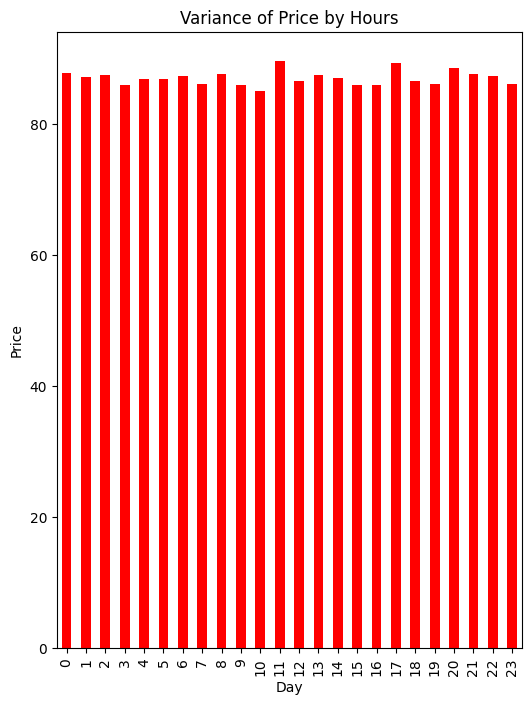

In [29]:
# variance
df_jam = df.pivot_table(index='hour',
                        values='price',
                        aggfunc=statistics.variance)
df_jam.plot(kind='bar', figsize=(6, 8), color='red', legend=None)
plt.title('Variance of Price by Hours')
plt.ylabel('Price')
plt.xlabel('Day')
plt.show()

In [30]:
# standard deviation
df_hari = df.groupby(['day'])['price']
df_hari.describe()['std']

day
1     9.352676
2     9.353373
3     9.242551
4     9.414552
9     9.252346
10    9.110735
13    9.293587
14    9.302670
15    9.309548
16    9.326386
17    9.345715
18    9.410368
26    9.271219
27    9.366719
28    9.328955
29    9.294890
30    9.304620
Name: std, dtype: float64

Analisis Harga berdasarkan Cuaca

In [31]:
df.rename(columns={'short_summary':'weather'}, inplace=True)
# count
df_cuaca = df.pivot_table(index='weather',
                            columns='cab_type',
                            values='id',
                            aggfunc='count')
df_cuaca

cab_type,Lyft,Uber
weather,,
Clear,38653,41603
Drizzle,3111,3614
Foggy,4002,4290
Light Rain,24328,26160
Mostly Cloudy,64720,69883
Overcast,97416,104013
Partly Cloudy,56663,60563
Possible Drizzle,8072,9104
Rain,10443,11338


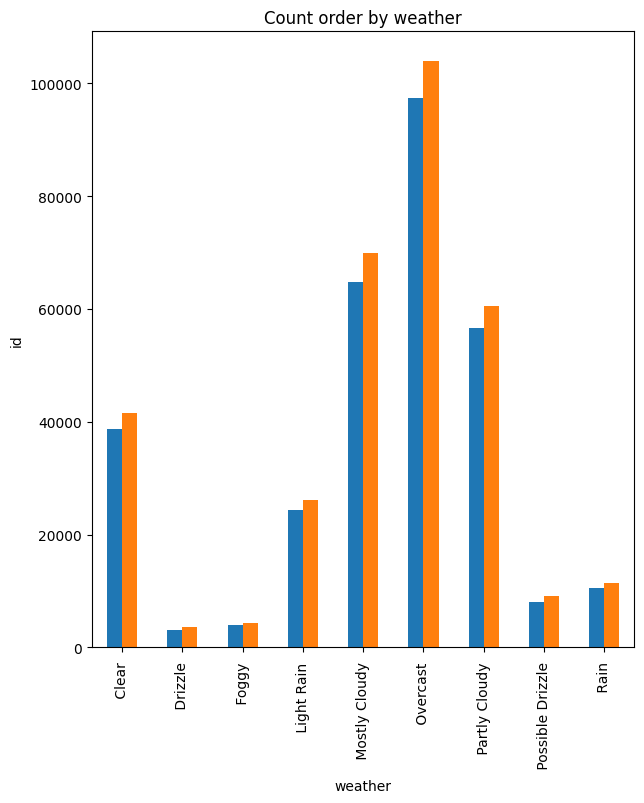

In [32]:
df_cuaca.plot(kind='bar', figsize=(7, 8), legend=None)
plt.title('Count order by weather')
plt.ylabel('id')
plt.xlabel('weather')
plt.show()

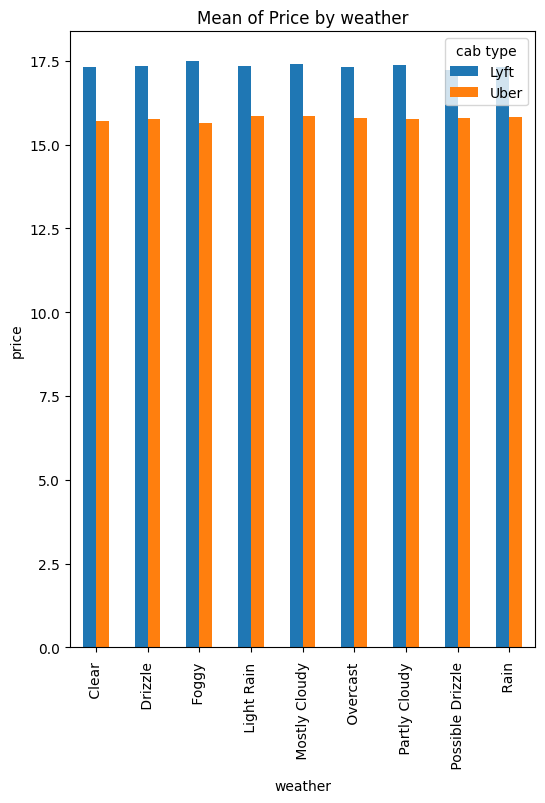

cab_type,Lyft,Uber
weather,,
Clear,17.314370,15.717256
Drizzle,17.346191,15.774903
Foggy,17.506247,15.640326
Light Rain,17.335067,15.841686
Mostly Cloudy,17.406237,15.842580
Overcast,17.322030,15.798112
Partly Cloudy,17.384013,15.773583
Possible Drizzle,17.239823,15.808930
Rain,17.312022,15.828894


In [33]:
# mean
df_cuaca = df.pivot_table(index='weather',
                            columns='cab_type',
                            values='price',
                            aggfunc='mean')
df_cuaca.plot(kind='bar', figsize=(6, 8), legend=None)
plt.title('Mean of Price by weather')
plt.legend(title='cab type')
plt.ylabel('price')
plt.xlabel('weather')
plt.show()
df_cuaca

Correlation

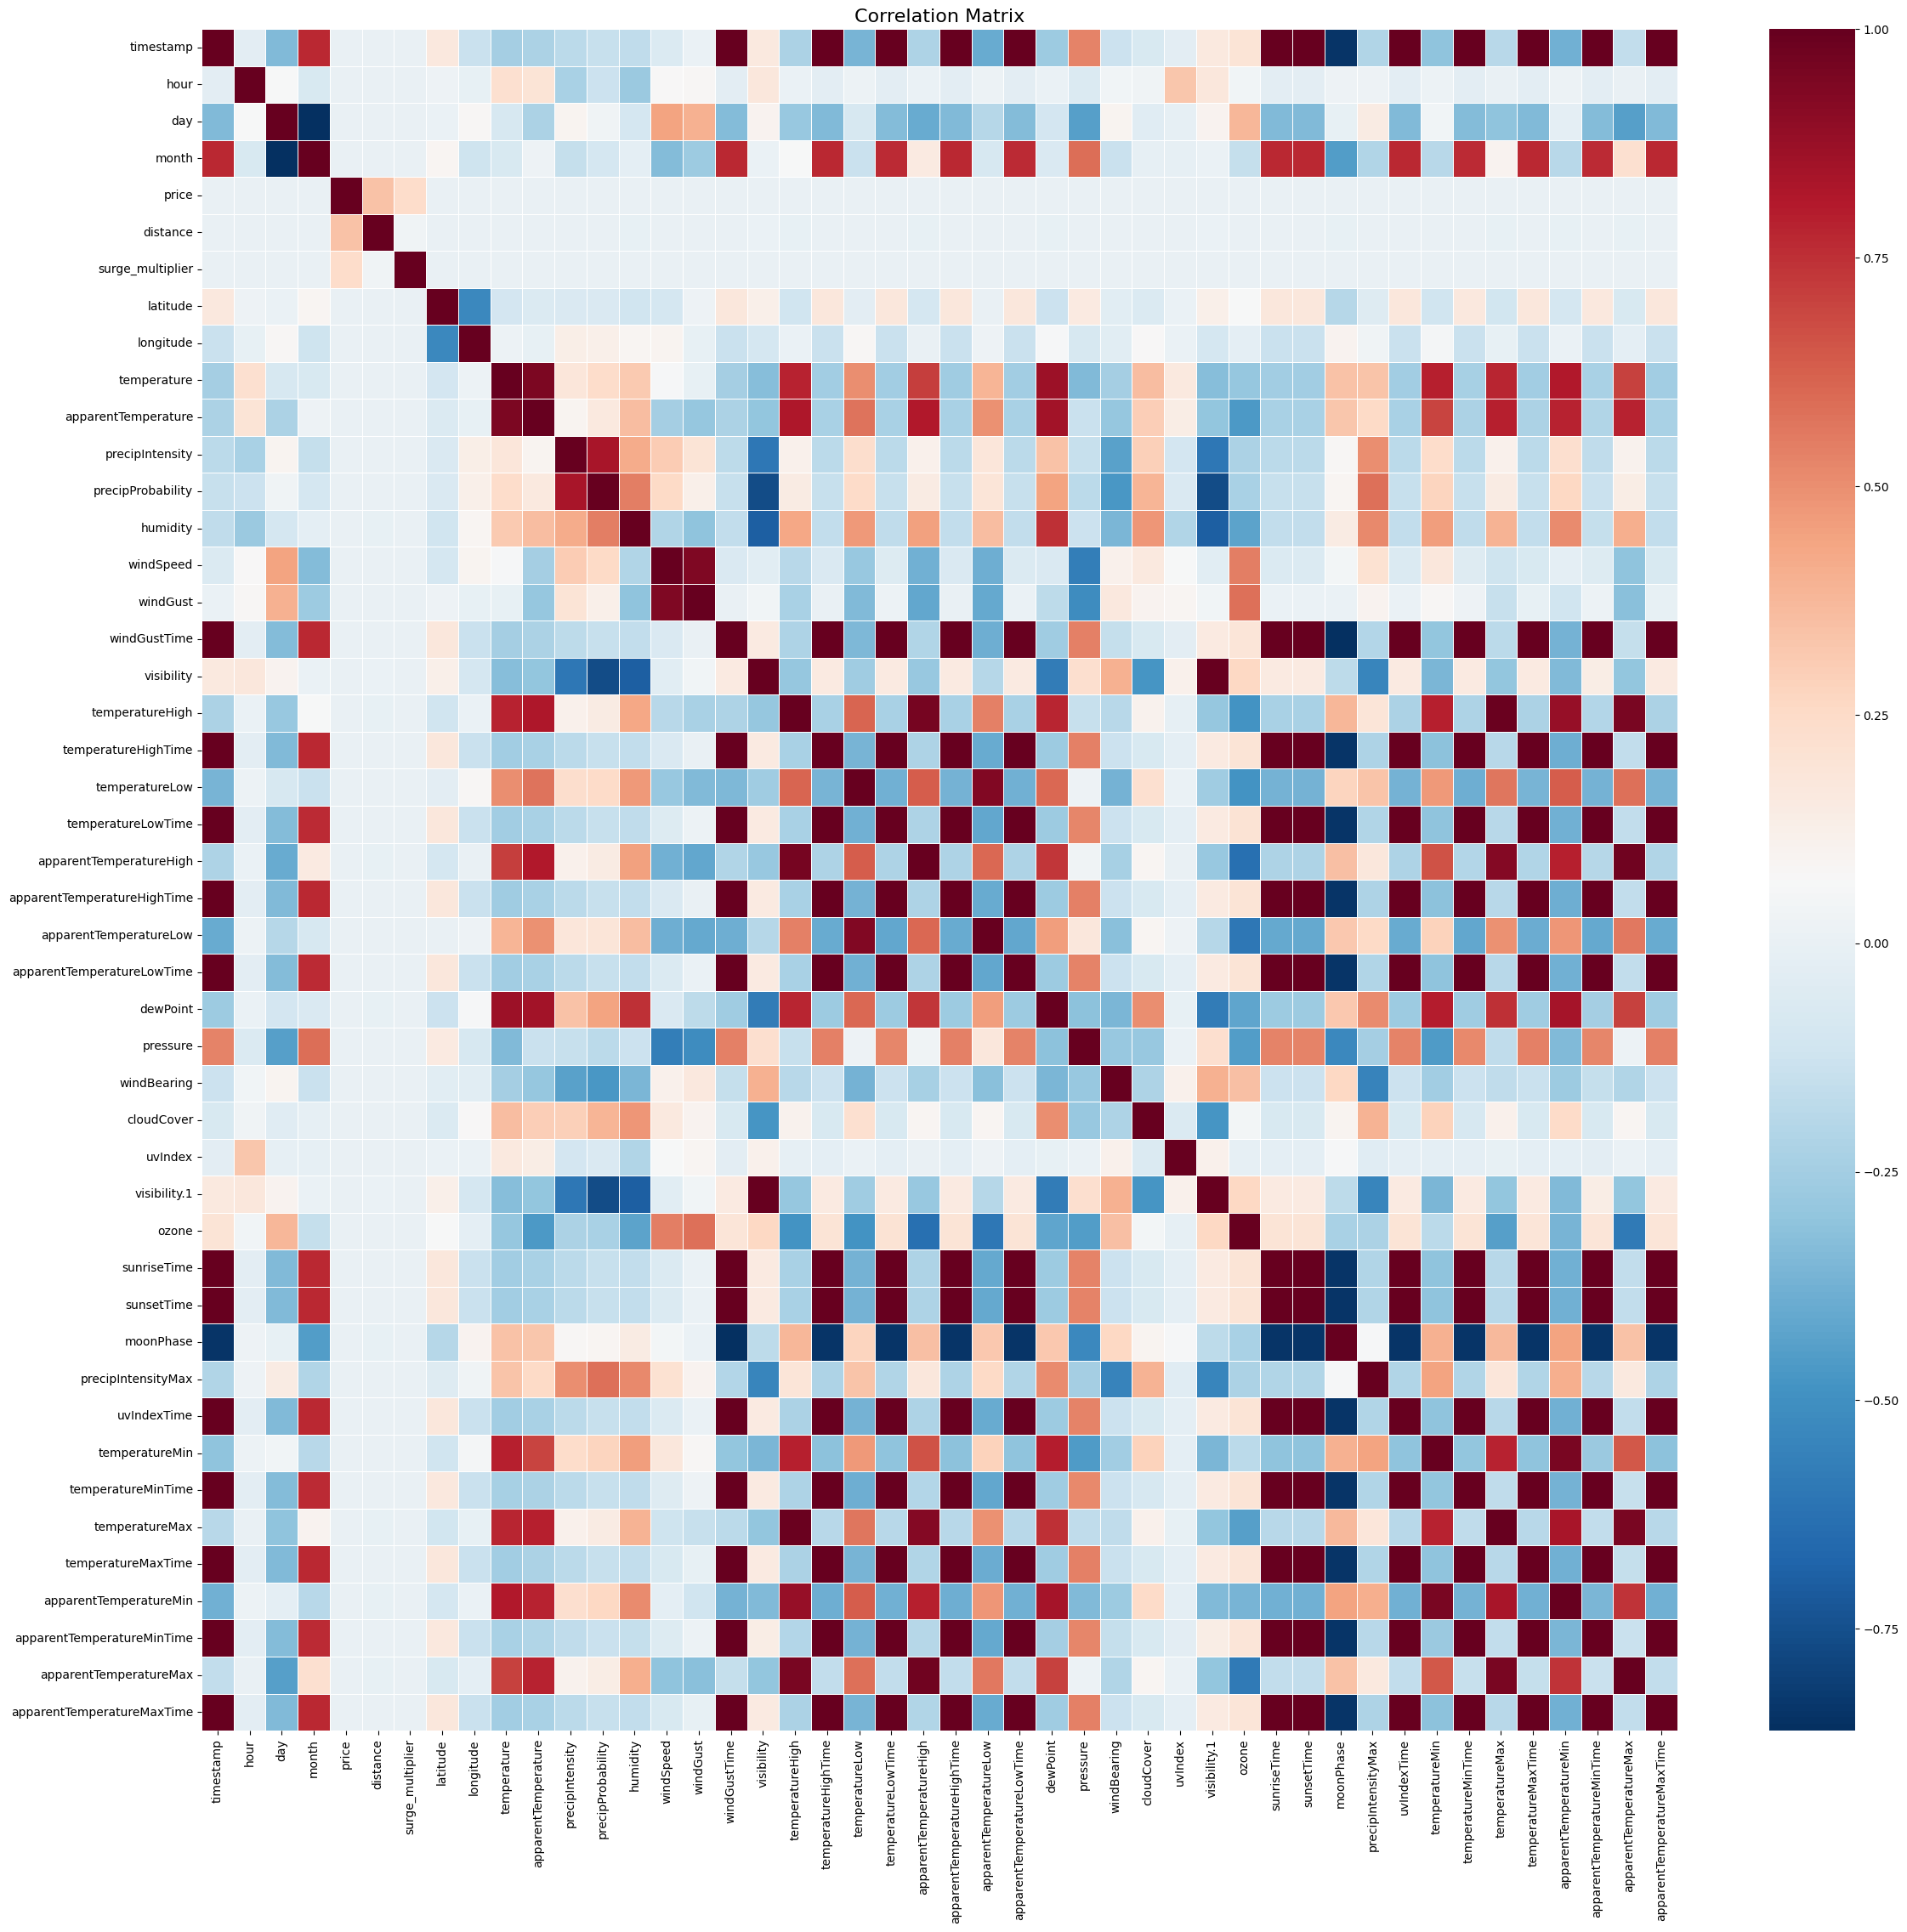

In [34]:
num_col_list = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')].to_list()
plt.figure(figsize = (28,26))
sns.heatmap(df[num_col_list].corr(),cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

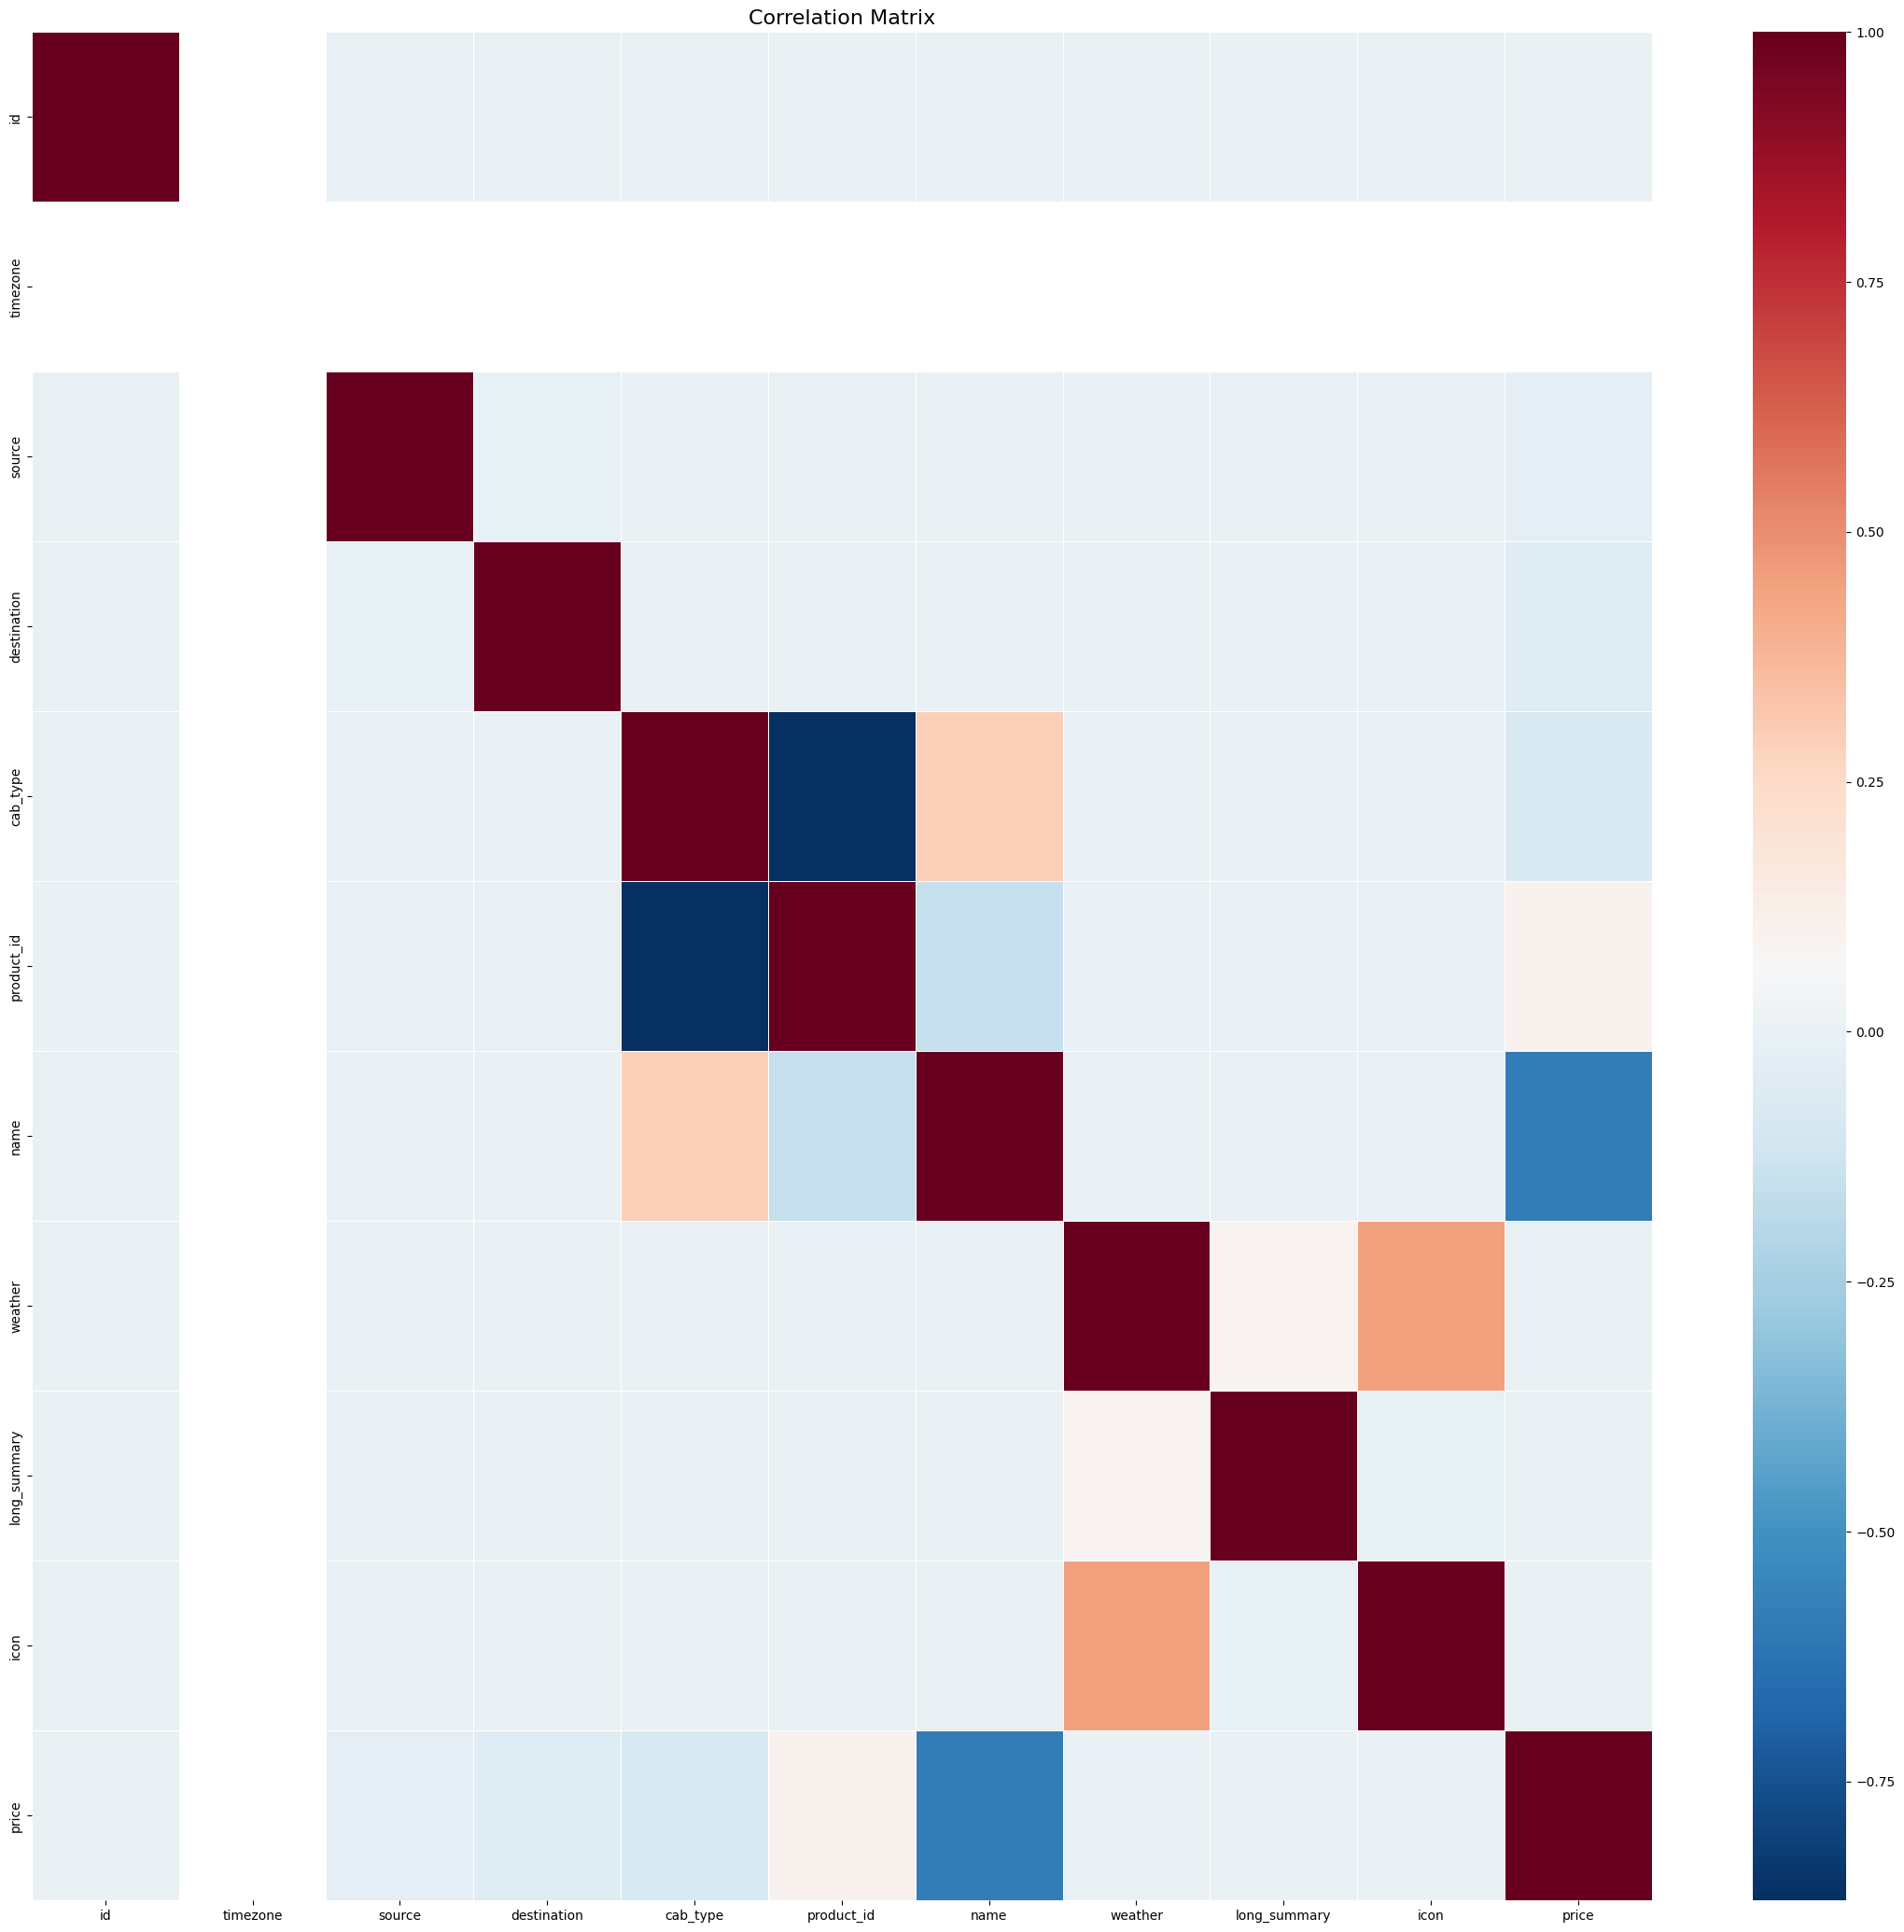

In [35]:
df_temp = df.copy()
cat_col_list = df_temp.columns[(df_temp.dtypes == 'category')].to_list()
for col in cat_col_list:
    df_temp[col] = preprocessing.LabelEncoder().fit_transform(df_temp[col])
plt.figure(figsize = (28,26))
cat_col_list.append('price')
sns.heatmap(df_temp[cat_col_list].corr(),cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

* Kesimpulan

Dari hasil korelasi tersebut dapat dilihat bahwa kolom yang paling berpengaruh terhadap price adalah:

1. name dengan korelasi -0.586644
2. distance dengan korelasi 0.345061
3. surge_multiplier dengan korelasi 0.240458
4. product_id dengan korelasi 0.102679
5. cab_type dengan korelasi -0.083385

In [36]:
df_temp.corr()['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
product_id                     0.102679
icon                           0.002100
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
weather                        0.001245
windGust                       0.001218
id                             0.001137
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760


# F. Preprocessing
Sebelum melakukan classification model, dicek dulu nilai kolom yang akan dijadikan fitur. Dari hasil visualisasi korelasi sebelumnya didapatkan 5 kolom yaitu name, distance, surge_multiplier, product_id, dan cab_type.

In [37]:
df['name'].unique()

['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', ..., 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool']
Length: 12
Categories (13, object): ['Black', 'Black SUV', 'Lux', 'Lux Black', ..., 'UberPool', 'UberX', 'UberXL', 'WAV']

In [38]:
# Nilai pada kolom name tidak ada keanehan sama sekali dan bisa diproses

df['distance'].unique()

array([0.44, 1.08, 1.11, 0.72, 2.48, 3.24, 2.94, 1.76, 0.71, 1.23, 1.16,
       2.67, 3.39, 2.82, 2.49, 3.07, 1.57, 3.2 , 3.61, 3.05, 1.75, 2.36,
       2.32, 1.02, 1.17, 4.43, 1.4 , 1.01, 2.84, 1.81, 1.3 , 2.44, 3.04,
       2.59, 3.25, 2.66, 3.26, 2.39, 3.28, 2.81, 3.18, 2.63, 3.14, 1.79,
       2.16, 1.39, 1.97, 2.92, 2.14, 0.91, 2.58, 3.23, 3.02, 0.64, 2.38,
       0.8 , 2.07, 2.61, 3.45, 1.35, 2.8 , 1.03, 3.35, 2.93, 1.07, 3.17,
       1.2 , 7.46, 1.58, 1.71, 1.21, 1.61, 3.3 , 4.39, 0.55, 4.42, 1.45,
       0.61, 0.49, 0.39, 3.8 , 2.46, 2.34, 2.56, 4.23, 1.56, 2.35, 3.37,
       1.52, 2.05, 2.15, 1.26, 1.5 , 4.76, 1.34, 3.41, 1.33, 2.19, 1.04,
       1.22, 1.09, 0.54, 2.09, 3.68, 1.66, 1.92, 2.33, 2.25, 2.88, 3.42,
       0.63, 1.41, 4.51, 0.56, 3.47, 4.09, 2.73, 3.19, 0.65, 2.78, 1.  ,
       2.62, 2.77, 2.47, 1.43, 3.1 , 1.89, 2.3 , 4.31, 1.06, 1.64, 1.86,
       4.1 , 1.74, 2.31, 2.83, 3.48, 1.78, 4.44, 0.52, 0.92, 3.08, 0.43,
       5.33, 4.5 , 0.46, 2.91, 1.14, 3.22, 1.69, 0.

In [39]:
# Nilai pada kolom distance tidak ada keanehan sama sekali dan bisa diproses.

df['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [40]:
# Nilai pada kolom surge_multiplier tidak ada keanehan sama sekali dan bisa diproses.

df['product_id'].unique()

['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus', ..., '6c84fd89-3f11-4782-9b50-97c468b19529', '55c66225-fbe7-4fd5-9072-eab1ece5e23e', '9a0e7b09-b92b-4c41-9779-2ad22b4d779d', '6d318bcc-22a3-4af6-bddd-b409bfce1546', '997acbb5-e102-41e1-b155-9df7de0a73f2']
Length: 12
Categories (13, object): ['55c66225-fbe7-4fd5-9072-eab1ece5e23e', '6c84fd89-3f11-4782-9b50-97c468b19529', '6d318bcc-22a3-4af6-bddd-b409bfce1546', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969', ..., 'lyft_lux', 'lyft_luxsuv', 'lyft_plus', 'lyft_premier']

In [41]:
# Nilai pada kolom product_id memiliki nilai yang sulit untuk dimengerti, oleh sebab itu nilai product_id akan diubah menjadi nilai yang bisa dibaca.

df['product_id'].value_counts()

6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft                                    51235
lyft_lux                                51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_premier                            51235
lyft_line                               51233
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a        0
Name: product_id, dtype: int64

In [42]:
df_cabtype_name

,price
name,
Black,20.523786
Black SUV,30.286763
Lux,17.771240
Lux Black,23.062468
Lux Black XL,32.324086
Lyft,9.610885
Lyft XL,15.309363
Shared,6.029893
UberPool,8.752500


In [43]:
df['product_id'] = (df['cab_type'].astype('str') + " " + df['name'].astype('str')).astype('category')

In [44]:
df['product_id'].value_counts()

Uber Black SUV       55096
Uber UberXL          55096
Uber WAV             55096
Uber Black           55095
Uber UberX           55094
Uber UberPool        55091
Lyft Lux             51235
Lyft Lux Black       51235
Lyft Lux Black XL    51235
Lyft Lyft            51235
Lyft Lyft XL         51235
Lyft Shared          51233
Name: product_id, dtype: int64

In [45]:
df['cab_type'].unique()

['Lyft', 'Uber']
Categories (2, object): ['Lyft', 'Uber']

In [46]:
# Nilai pada kolom cab_type tidak ada keanehan sama sekali. Setelah cek nilai pada kolom fitur yang akan digunakan, selanjutnya akan dilakukan encoding untuk fitur dengan tipe data categorical.

df['name_cat'] = preprocessing.LabelEncoder().fit_transform(df['name'])
df['product_id_cat'] = preprocessing.LabelEncoder().fit_transform(df['product_id'])
df['cab_type_cat'] = preprocessing.LabelEncoder().fit_transform(df['cab_type'])

In [47]:
df[['name', 'name_cat']].value_counts()

name          name_cat
Black SUV     1           55096
UberXL        10          55096
WAV           11          55096
Black         0           55095
UberX         9           55094
UberPool      8           55091
Lux           2           51235
Lux Black     3           51235
Lux Black XL  4           51235
Lyft          5           51235
Lyft XL       6           51235
Shared        7           51233
dtype: int64

In [48]:
df[['product_id', 'product_id_cat']].value_counts()

product_id         product_id_cat
Uber Black SUV     7                 55096
Uber UberXL        10                55096
Uber WAV           11                55096
Uber Black         6                 55095
Uber UberX         9                 55094
Uber UberPool      8                 55091
Lyft Lux           0                 51235
Lyft Lux Black     1                 51235
Lyft Lux Black XL  2                 51235
Lyft Lyft          3                 51235
Lyft Lyft XL       4                 51235
Lyft Shared        5                 51233
dtype: int64

In [49]:
df[['cab_type', 'cab_type_cat']].value_counts()

cab_type  cab_type_cat
Uber      1               330568
Lyft      0               307408
dtype: int64

In [50]:
# Selanjutnya akan dibuat variabel, set train dan test yang akan digunakan nantinya pada saat pembuatan model.

x = df[['distance','surge_multiplier','cab_type_cat','name_cat','product_id_cat']]
y = df['price']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# G. Model Definition
Alasan dipilihnya kolom name, distance, surge_multiplier, product_id, dan cab_type adalah karena 5 kolom ini memiliki korelasi yang paling kuat dibandingkan dengan kolom lainnya. Meskipun product_id berasal dari name dan cab_type, ternyata product_id memiliki pengaruh sendiri sendiri.

In [52]:
# Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# H. Model Training

In [53]:
pred_test = model.predict(x_test)

In [54]:
test = x_test.copy()
df_test = pd.DataFrame(test)

In [55]:
df_test['predicted_price'] = pred_test

In [56]:
df_test.head(10)

,distance,surge_multiplier,cab_type_cat,name_cat,product_id_cat,predicted_price
526491,4.51,1.0,0,7,5,18.846619
506474,2.80,1.0,1,11,11,10.093378
139551,1.09,1.0,0,5,3,12.798296
235222,0.92,1.0,1,0,6,22.729947
140436,1.12,1.0,0,3,1,16.335086
62314,5.56,1.0,1,11,11,17.761468
192444,3.40,1.0,0,6,4,17.489433
309129,0.73,1.0,0,2,0,16.978272
33575,2.45,1.0,1,9,9,12.574416
87489,2.80,1.0,1,1,7,26.226419


# I. Model Evaluation

In [57]:
print("Accuracy Score: ", str(model.score(x_test, y_test)))
print("Mean Squared Error: ", str(mean_squared_error(y_test, pred_test)))

Accuracy Score:  0.5173297518464015
Mean Squared Error:  42.107032605709406


# J. Kesimpulan
Dari hasil Model Evaluation, fitur distance, surge_multiplier, cab_type, name, product_id memiliki pengaruh terhadap akurasi pada model sebesar 50%. Akurasi sebesar 50% ini bisa dibilang rendah dan kemungkinan faktor yang membuat didapatnya akurasi yang rendah ini yaitu, hanya mengambil 5 kolom dari total 56 kolom sebagai fitur. Terdapat kolom lain yang berpengaruh terhadap nilai price, dan lain sebagainya.